In [ ]:
import pandas as pd
import tweepy as twt


In [ ]:
!pip install tweepy


In [ ]:
#Twitter API credentials
consumer_key = "P****************************"
consumer_secret = "FcBYiZD90#################xrpjdcqiZ8CHQEgwh"
access_key = "747311852##################################9vtiQmzxNN7RpROhILn"
access_secret = "Btp**************************rzMP"

alltweets = []


In [ ]:
def get_all_tweets(screen_name):
    auth = twt.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = twt.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    
    
    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

pm_ind= get_all_tweets("KamalaHarris")


...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...2000 tweets downloaded so far
...2199 tweets downloaded so far
...2399 tweets downloaded so far
...2599 tweets downloaded so far
...2799 tweets downloaded so far
...2998 tweets downloaded so far
...3198 tweets downloaded so far
...3207 tweets downloaded so far
...3207 tweets downloaded so far


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


In [ ]:
data = pd.read_csv("/content/KamalaHarris_tweets.csv")

In [ ]:
data.head(10)

,Unnamed: 0,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,0,2020-11-14 02:11:00,[],[],71821,None,1327433824314208257,en,None,6197,False,Sprout Social,Getting rid of the Affordable Care Act will ta...,California,Kamala Harris,None,None
1,1,2020-11-13 23:35:33,[],"[{'screen_name': 'JoeBiden', 'name': 'Joe Bide...",0,None,1327394702002413569,en,None,9005,False,Twitter Web App,RT @JoeBiden: As the remnants of Tropical Stor...,California,Kamala Harris,None,None
2,2,2020-11-13 23:07:50,[],[],72576,None,1327387727336239104,en,None,5427,False,Twitter Web App,"Now the hard work, the necessary work, the goo...",California,Kamala Harris,None,None
3,3,2020-11-13 19:43:54,[],[],76383,None,1327336404758761472,en,None,6866,False,Twitter Web App,Black and Latino Americans are 3x as likely to...,California,Kamala Harris,None,None
4,4,2020-11-13 17:38:49,[],"[{'screen_name': 'Transition46', 'name': 'Bide...",0,None,1327304926318505993,en,None,2609,False,Twitter for iPhone,RT @Transition46: The presidential transition ...,California,Kamala Harris,None,None
5,5,2020-11-13 14:29:56,[],[],127791,None,1327257394456522753,en,None,14057,False,Twitter Media Studio,"Together, we showed little girls across the co...",California,Kamala Harris,None,None
6,6,2020-11-13 02:27:16,[],[],141974,None,1327075528453607424,en,None,11618,False,Twitter Web App,Too many people are grieving the devastating l...,California,Kamala Harris,None,None
7,7,2020-11-12 23:17:48,[],"[{'screen_name': 'JoeBiden', 'name': 'Joe Bide...",192442,None,1327027847307948035,en,None,14125,False,Twitter for iPhone,Hope.\nUnity.\nDecency.\nTruth.\n\nThese are t...,California,Kamala Harris,None,None
8,8,2020-11-12 20:03:48,[],[],166079,None,1326979027912056834,en,None,14280,False,Twitter Web App,"For your family, for your neighbor, for your c...",California,Kamala Harris,None,None
9,9,2020-11-12 18:50:36,[],"[{'screen_name': 'JoeBiden', 'name': 'Joe Bide...",0,None,1326960605136359426,en,None,9893,False,Twitter Web App,RT @JoeBiden: Because of the Affordable Care A...,California,Kamala Harris,None,None


In [ ]:
data = data.drop(data.iloc[:,0:7], axis=1)

In [ ]:
data.dtypes

lang             object
place            object
retweet_count     int64
retweeted          bool
source           object
text             object
location         object
name             object
time_zone        object
utc_offset       object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   lang           3207 non-null   object
 1   place          3207 non-null   object
 2   retweet_count  3207 non-null   int64 
 3   retweeted      3207 non-null   bool  
 4   source         3207 non-null   object
 5   text           3207 non-null   object
 6   location       3207 non-null   object
 7   name           3207 non-null   object
 8   time_zone      3207 non-null   object
 9   utc_offset     3207 non-null   object
dtypes: bool(1), int64(1), object(8)
memory usage: 228.7+ KB


Text(0, 0.5, 'Count')

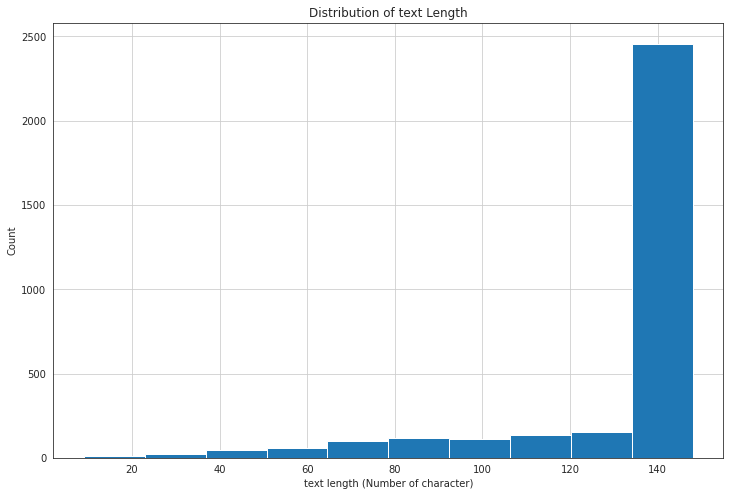

In [ ]:
text_length = data["text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
text_length.loc[text_length < 1500].hist()
plt.title("Distribution of text Length")
plt.xlabel('text length (Number of character)')
plt.ylabel('Count')

In [ ]:
#data.retweet_count.hist()
#data.retweet_count.hist(bins=10)
#plt.xlabel('Ratings')
#plt.ylabel('Count')

In [ ]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###
data['text']= data['text'].apply(lambda x: " ".join(word.lower() for word in x.split()))


In [ ]:
## removing punctuation from review..#
import string
data['text']=data['text'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))
            

In [ ]:
## Remove Numbers from tweets...##
data['text']=data['text'].str.replace('[0-9]','')


In [ ]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords
nltk.download('stopwords')
#stopwords = pd.read_csv('/content/stop(1).txt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words=stopwords.words('english')

In [ ]:
data['text']=data['text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))


In [ ]:
import re #regular expression
import string
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    
    return text

clean = lambda x: clean_text(x)

In [ ]:
data.head(5)

,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,en,None,6197,False,Sprout Social,getting rid affordable care act take us backwa...,California,Kamala Harris,None,None
1,en,None,9005,False,Twitter Web App,rt joebiden remnants tropical storm eta contin...,California,Kamala Harris,None,None
2,en,None,5427,False,Twitter Web App,hard work necessary work good work begins unit...,California,Kamala Harris,None,None
3,en,None,6866,False,Twitter Web App,black latino americans x likely contract covid...,California,Kamala Harris,None,None
4,en,None,2609,False,Twitter for iPhone,rt transition presidential transition moving f...,California,Kamala Harris,None,None


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from textblob import Word
data['text']= data['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [ ]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['text']= data['text'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [ ]:
text_set=data['text']

In [ ]:
import re
import sys

# https://stackoverflow.com/a/49146722/330558
def remove_emoji(text_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#text = remove_emoji(text_set)
    

In [ ]:
def remove_emoji(text_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['text'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aapi  aapivictoryfund  ab  abandone  ...  zoom  zoramag  𝙜𝙤  𝙜𝙤𝙩𝙩𝙖
0        0                0   0         0  ...     0        0   0      0
1        0                0   0         0  ...     0        0   0      0
2        0                0   0         0  ...     0        0   0      0
3        0                0   0         0  ...     0        0   0      0
4        0                0   0         0  ...     0        0   0      0
...    ...              ...  ..       ...  ...   ...      ...  ..    ...
3202     0                0   0         0  ...     0        0   0      0
3203     0                0   0         0  ...     0        0   0      0
3204     0                0   0         0  ...     0        0   0      0
3205     0                0   0         0  ...     0        0   0      0
3206     0                0   0         0  ...     0        0   0      0

[3207 rows x 8766 columns]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['text'])
print(TFIDF)


  (0, 4984)	0.2835034681772818
  (0, 7043)	0.2835034681772818
  (0, 1582)	0.2284359404547705
  (0, 1928)	0.24591403263886685
  (0, 7411)	0.18656400057666825
  (0, 2013)	0.21028029387781055
  (0, 4867)	0.09903630965431416
  (0, 152)	0.2835034681772818
  (0, 7748)	0.2835034681772818
  (0, 5319)	0.2696303259400092
  (0, 5212)	0.16234820382427204
  (0, 5267)	0.1920064593466034
  (0, 4883)	0.12916270174672762
  (0, 5323)	0.24591403263886685
  (0, 1919)	0.14120570837042795
  (0, 5765)	0.1920064593466034
  (0, 7404)	0.16996358101052694
  (0, 7480)	0.18339765474419803
  (0, 5230)	0.2835034681772818
  (0, 139)	0.1677052735338325
  (0, 5093)	0.16656465528874684
  (0, 6686)	0.09144816413572954
  (1, 2893)	0.5340903674343978
  (1, 6869)	0.48941139442279336
  (1, 7324)	0.5079548436518766
  :	:
  (2915, 5971)	0.271382537775357
  (2915, 6307)	0.2376050049761191
  (2915, 6375)	0.180499394520368
  (2915, 1644)	0.2614754202947606
  (2915, 1880)	0.11244826440272375
  (2915, 7480)	0.09229473871867602
  (2

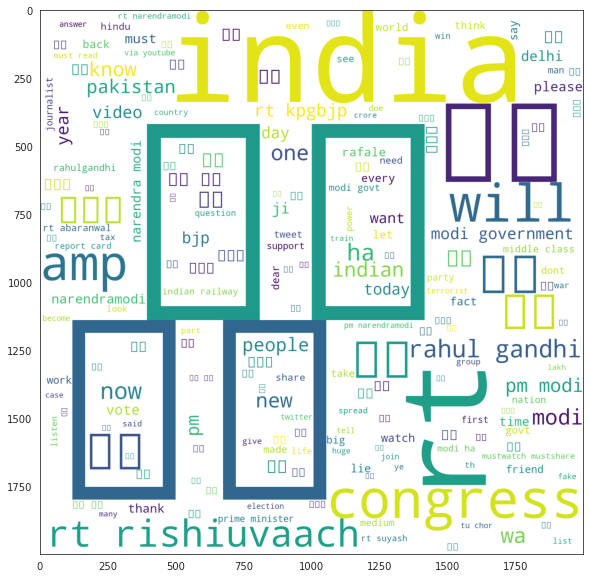

In [ ]:
Review_wordcloud = ' '.join(data['text'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [ ]:
freq = pd.Series(' '.join(data['text']).split()).value_counts()[0:20]
freq


rt           483
trump        376
joebiden     369
day          246
people       239
american     237
president    182
today        180
it’s         170
justice      169
need         157
vote         152
one          148
donald       139
must         136
time         135
family       134
black        130
make         130
year         130
dtype: int64

In [ ]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')
  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from textblob import TextBlob
data['polarity'] = data['text'].apply(lambda x: TextBlob(x).sentiment[0])
data[['text','polarity']].head(5)

,text,polarity
0,rt kpgbjp after listening to the news from mah...,0.35
1,this man is talking sense httpstcogqrcuuwpd,0.00
2,save diwali save hinduism httpstcoskhffrlpq,0.00
3,ahankaar bhootnath is an iit graduate who succ...,0.75
4,dineshmohaniya tsrawatbjp दिल्ली जल बोर्ड को ख...,0.00


In [ ]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,source,text,location,name,time_zone,utc_offset,polarity
0,Twitter for Android,rt kpgbjp after listening to the news from mah...,NaN,PMO India: Report Card,None,None,0.350000
3,Twitter for Android,ahankaar bhootnath is an iit graduate who succ...,NaN,PMO India: Report Card,None,None,0.750000
6,Twitter for Android,rt rishiuvaach miyan lord is all set to ban cr...,NaN,PMO India: Report Card,None,None,0.500000
7,Twitter for Android,rt amdavadamc social distancing is by far the ...,NaN,PMO India: Report Card,None,None,0.308333
16,Twitter for Android,ajeetbharti is the best आओ औकात की बात करते है...,NaN,PMO India: Report Card,None,None,1.000000


In [ ]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative') 


In [ ]:
sent_type(data['polarity'])


positive
neutral
neutral
positive
neutral
neutral
positive
positive
neutral
neutral
neutral
neutral
negative
negative
neutral
neutral
positive
neutral
neutral
neutral
negative
negative
positive
neutral
positive
neutral
neutral
neutral
positive
positive
positive
positive
neutral
neutral
positive
positive
neutral
positive
positive
neutral
negative
neutral
positive
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
negative
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
negative
neutral
positive
neutral
neutral
positive
negative
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
positive
neutral
negative
neutral
positive
neutral
positive
neutral
neutral
negative
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
positive
neutral
negative
positive
positive
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral


In [ ]:
data["category"]=data['polarity']

In [ ]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"


In [ ]:
data["category"]=data["category"].astype('category')
data.dtypes

source          object
text            object
location       float64
name            object
time_zone       object
utc_offset      object
polarity       float64
category      category
dtype: object

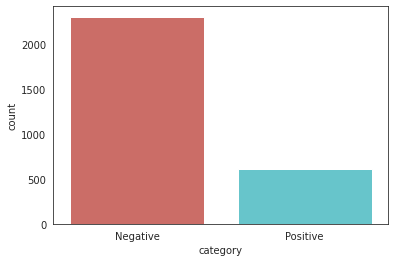

In [ ]:
sns.countplot(x='category',data=data,palette='hls')

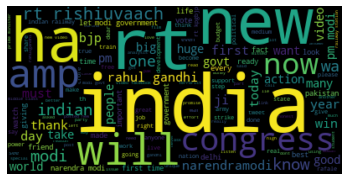

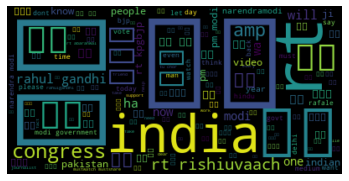

In [ ]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.text.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.text.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()